In [26]:
import os
import numpy as np
import pandas as pd
import joblib
import tensorflow as tf
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import cv2
from matplotlib import pyplot as plt

from google.colab import drive
import sys

In [22]:
# Cargar bases de datos procesadas
x_train = joblib.load('/content/drive/MyDrive/cod/A3_helath/data/salidas/x_train.pkl')
y_train = joblib.load('/content/drive/MyDrive/cod/A3_helath/data/salidas/y_train.pkl')
x_test = joblib.load('/content/drive/MyDrive/cod/A3_helath/data/salidas/x_test.pkl')
y_test = joblib.load('/content/drive/MyDrive/cod/A3_helath/data/salidas/y_test.pkl')

In [24]:
# Ver las formas (número de imágenes, alto, ancho, canales, etc.)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (5712, 198, 150, 3)
y_train shape: (5712, 1)
x_test shape: (1311, 198, 150, 3)
y_test shape: (1311, 1)


In [35]:
# Celda 1: Conversión a float32 para escalar
x_train = x_train.astype('float32')  # para poder escalarlo
x_test = x_test.astype('float32')    # para poder escalarlo

# Celda 2: Escalado entre 0 y 1
x_train /= 255
x_test /= 255

# Celda 3: Mostrar formas de los datos
print("Shape x_train:", x_train.shape)
print("Shape x_test:", x_test.shape)

# Celda 4: Cantidad de variables por imagen (producto de dimensiones)
print("Variables por imagen (x_train[1]):", np.prod(x_train[1].shape))

# Celda 5: Conteo de etiquetas únicas
print("Distribución y_train:", np.unique(y_train, return_counts=True))
print("Distribución y_test:", np.unique(y_test, return_counts=True))

# Celda 6: Formas de las etiquetas
print("Shape y_train:", y_train.shape)
print("Shape y_test:", y_test.shape)

# Celda 7: Reestructurar arrays de imágenes a 1D (reshape)
# x_train2 = x_train.reshape(5712, 89100)
# x_test2 = x_test.reshape(1311, 89100)

x_train2 = x_train.reshape(x_train.shape[0], -1)
x_test2 = x_test.reshape(x_test.shape[0], -1)

print("Shape x_train2:", x_train2.shape)
print("Shape x_test2:", x_test2.shape)

# Celda 8: Mostrar la primera imagen del conjunto reestructurado
print("Primera imagen reestructurada (x_train2[1]):", x_train2[1])

Shape x_train: (5712, 198, 150, 3)
Shape x_test: (1311, 198, 150, 3)
Variables por imagen (x_train[1]): 89100
Distribución y_train: (array([0, 1, 2, 3]), array([1321, 1339, 1457, 1595]))
Distribución y_test: (array([0, 1, 2, 3]), array([300, 306, 300, 405]))
Shape y_train: (5712, 1)
Shape y_test: (1311, 1)
Shape x_train2: (5712, 89100)
Shape x_test2: (1311, 89100)
Primera imagen reestructurada (x_train2[1]): [0. 0. 0. ... 0. 0. 0.]


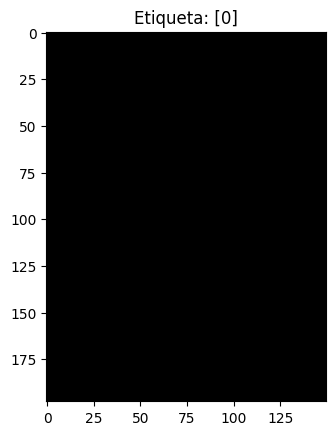

In [36]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1], cmap='gray')
plt.title(f"Etiqueta: {y_train[1]}")
plt.show()

In [29]:
imagen = x_train2[1]

# Verifica si hay valores exactamente 1.0
print("¿Hay valores 1.0?:", np.any(imagen == 1.0))

# Verifica si hay valores exactamente 0.0
print("¿Hay valores 0.0?:", np.any(imagen == 0.0))

¿Hay valores 1.0?: False
¿Hay valores 0.0?: True


In [30]:
print("Valor mínimo en la imagen:", np.min(imagen))
print("Valor máximo en la imagen:", np.max(imagen))

Valor mínimo en la imagen: 0.0
Valor máximo en la imagen: 1.3870985e-05


In [31]:
x_train_raw = x_train * 255  # Reviertes el escalado
print("Máximo valor real en la imagen:", np.max(x_train_raw[1]))
print("Mínimo valor real en la imagen:", np.min(x_train_raw[1]))

Máximo valor real en la imagen: 0.0035371012
Mínimo valor real en la imagen: 0.0


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Asegurar que las etiquetas tengan forma correcta
y_train = y_train.ravel()
y_test = y_test.ravel()

print("### REGRESIÓN LOGÍSTICA ###")

# OPCIÓN 1: Eliminar parámetro deprecated
lr = LogisticRegression(max_iter=1000, solver='lbfgs')
# OPCIÓN 2: Usar OneVsRestClassifier
# lr = OneVsRestClassifier(LogisticRegression(max_iter=1000, solver='lbfgs'))

lr.fit(x_train2, y_train)

# Clases predichas
pred_train_lr = lr.predict(x_train2)
print("Entrenamiento:")
print(metrics.classification_report(y_train, pred_train_lr, zero_division=0))

# AUC requiere probabilidades
probs_train_lr = lr.predict_proba(x_train2)
print("AUC train:", metrics.roc_auc_score(y_train, probs_train_lr, multi_class='ovr', average='macro'))

# Clases predichas en test
pred_test_lr = lr.predict(x_test2)
print("Test:")
print(metrics.classification_report(y_test, pred_test_lr, zero_division=0))

# AUC en test
probs_test_lr = lr.predict_proba(x_test2)
print("AUC test:", metrics.roc_auc_score(y_test, probs_test_lr, multi_class='ovr', average='macro'))

### REGRESIÓN LOGÍSTICA ###
Entrenamiento:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1321
           1       0.00      0.00      0.00      1339
           2       0.00      0.00      0.00      1457
           3       0.28      1.00      0.44      1595

    accuracy                           0.28      5712
   macro avg       0.07      0.25      0.11      5712
weighted avg       0.08      0.28      0.12      5712

AUC train: 0.5
Test:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       300
           1       0.00      0.00      0.00       306
           2       0.00      0.00      0.00       300
           3       0.31      1.00      0.47       405

    accuracy                           0.31      1311
   macro avg       0.08      0.25      0.12      1311
weighted avg       0.10      0.31      0.15      1311

AUC test: 0.5
